## Import Required Libraries

In [2]:
import tensorflow as tf
# from tensorflow import feature_column
# from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

## Load CSV Dataset

In [3]:
df = pd.read_csv('D:\\desktop files\\weka\Datasets\\Prof Ugwu\\sylvas_weather_nna1.csv')

In [19]:
df

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RToday,RainTomorrow
0,17.5,32.3,1.0,7,20,82,33,1010.8,1006.0,17.8,29.7,0.2,0,No
1,15.9,21.7,2.2,15,13,89,91,1010.5,1004.2,15.9,17.0,15.6,1,Yes
2,15.9,18.6,15.6,28,28,76,93,994.3,993.0,17.4,15.8,3.6,1,Yes
3,13.5,22.9,16.8,6,20,80,65,1005.8,1002.2,18.0,21.5,10.6,1,Yes
4,12.5,24.2,1.2,11,22,78,70,1005.6,1003.4,12.5,18.2,0.8,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25151,24.8,39.8,0.4,15,20,38,24,1007.0,1003.6,31.5,36.6,6.2,0,Yes
25152,22.2,39.4,6.2,19,9,56,25,1008.4,1004.9,28.6,38.7,0.2,1,No
25153,15.2,21.5,6.8,19,9,65,65,1016.9,1015.3,19.0,21.2,12.6,1,Yes
25154,17.7,26.9,12.6,15,20,93,59,1018.1,1014.7,19.0,26.0,34.6,1,Yes


In [6]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RISK_MM         0
RToday          0
RainTomorrow    0
dtype: int64

In [4]:
X = df.iloc[0:6999,0:12]
Y = df.iloc[0:6999,13]

In [5]:
Y

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
6994    Yes
6995    Yes
6996    Yes
6997    Yes
6998    Yes
Name: RainTomorrow, Length: 6999, dtype: object

In [6]:
x= X.to_numpy()
y= Y.to_numpy()

In [7]:
y

array(['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [8]:
# X.shape
Y.shape

(6999,)

In [9]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.preprocessing import scale

## Divide data into train and test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
y_train

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [52]:
xx_train = scale(X_train)
xx_test = scale(X_test)
# y_train = scale(y_train)
# y_test = scale(y_test)

In [53]:
# X_traintest = sc.transform(xx_train,xx_test)

TypeError: [[ 1.53686834  0.77152314 -0.57371455 ...  1.5947223  -0.04665871
  -0.38699601]
 [-1.27395125 -0.89179909 -0.42185345 ... -1.76543484 -0.79892349
   0.17402802]
 [-0.94711176 -0.95417368 -0.58539617 ... -0.91419503 -0.75593693
   0.75998645]
 ...
 [-0.72921877 -1.66108562  0.68790068 ... -1.27261179 -1.80910762
   2.38072253]
 [-2.18910181 -1.66108562 -0.51530643 ... -2.14625265 -1.50820171
  -0.41193041]
 [-1.05605825 -0.35121937 -0.49194319 ... -0.86939293 -0.71295037
  -0.41193041]] is not an estimator instance.

In [265]:
# from sklearn.linear_model import LogisticRegression

In [293]:
# logmodel = LogisticRegression()

In [294]:
# logmodel.fit(X_train, y_train)

LogisticRegression()

In [295]:
# from sklearn.metrics import classification_report

In [296]:
# prediction = logmodel.predict(X_test)

In [273]:
# classification_report(y_train, prediction)

ValueError: Found input variables with inconsistent numbers of samples: [4899, 2100]

In [20]:
# weather = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\sylvas_weather_mod.csv')

## Clasification - Training

In [12]:
import secrets

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### Training

In [13]:
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train.ravel())

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train)))
Train_accuracy = accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))
print("Train Accuracy: " + str(Train_accuracy*100) + '%')

Accuracy Score on train data:  1.0
Train Accuracy: 100.0%


### Predict test result

In [14]:
# Predict test data
y_test_predict = classifier.predict(X_test)
# print("Accuracy: " + str(accuracy) + '%')

print(y_test_predict)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_test_predict))
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_predict)
print("Test Accuracy: " + str(test_accuracy*100) + '%')

['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
Accuracy Score on test data:  1.0
Test Accuracy: 100.0%


#### Predicted Labels

In [16]:
# for index, item in zip(range(limit), items):
#     print(index, item)

# for index, item in enumerate(islice(items, limit)):

for index,x in enumerate(y_test_predict):
    for y in y_test:
        print('--  Actual =>' + y)
    print('  predicted => ' + x)
    if index == 10:
        break

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  A

--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>

--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Ac

--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
-- 

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Y

--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual

--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No

--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
  predicted => Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>

--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
-- 

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Y

--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
  predicted => Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
-

--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual 

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =

--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Act

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
  predicted => No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Y

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
-- 

--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual

--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  A

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No

--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Ac

--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
-- 

--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes

--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual

--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>No
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>Yes
--  Actual =>No
--  Actual =>Yes
--  Actual =>No
--  Actual =>No

#### Actual Label

In [57]:
for y in y_test:
    print(y)

Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
Yes
No
No
Yes
Yes
No
No
Yes
No
No
Yes
Yes
No
No
No
Yes
Yes
No
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
No
Yes
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
No
No
No
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
No
No
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes

#### Classification Report

In [53]:
# Get the classification report
accuracy = accuracy_score(y_test, y_test_predict) *100
print(classification_report(y_test, y_test_predict))
# print("Accuracy: " + str(accuracy) + '%')

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       670
         Yes       1.00      1.00      1.00      1430

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [ ]:
#Importing the accuracy metric from sklearn.metrics library
# from sklearn.metrics import accuracy_score

In [45]:
# print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train)))
# print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_test_predict))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


## Regression

In [24]:
Z = df.iloc[0:6999,10]

In [25]:
Z

0       29.7
1       17.0
2       15.8
3       21.5
4       18.2
        ... 
6994    17.8
6995    16.0
6996    14.5
6997    17.2
6998    17.4
Name: Temp3pm, Length: 6999, dtype: float64

#### Test dataset extraction



In [57]:
# test dataset extraction
ddf = df.drop(['Temp3pm'], axis=1)
R = ddf.iloc[0:6999,0:11]

In [22]:
R

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,RISK_MM
0,17.5,32.3,1.0,7,20,82,33,1010.8,1006.0,17.8,0.2
1,15.9,21.7,2.2,15,13,89,91,1010.5,1004.2,15.9,15.6
2,15.9,18.6,15.6,28,28,76,93,994.3,993.0,17.4,3.6
3,13.5,22.9,16.8,6,20,80,65,1005.8,1002.2,18.0,10.6
4,12.5,24.2,1.2,11,22,78,70,1005.6,1003.4,12.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...
6994,17.1,21.2,5.8,19,37,59,71,1018.5,1020.8,19.8,9.8
6995,11.4,17.9,9.8,39,63,93,95,1026.2,1024.0,13.9,75.8
6996,13.5,17.6,75.8,69,69,80,87,1023.7,1020.2,15.8,81.8
6997,12.5,18.1,6.6,19,30,78,73,1007.7,1010.4,14.4,2.4


In [26]:
# converrrrting dataset dataframe to numpy array to feed model

r= R.to_numpy()
z= Z.to_numpy()

In [27]:
# splitting dataset into train and test dataset

R_train, R_test, z_train, z_test = train_test_split(r, z, test_size=0.3, random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
S_train = sc.fit_transform(R_train)
S_test = sc.transform(R_test)

#### Decision Tree Regression

In [54]:
# decision tree with regression
regression = tree.DecisionTreeRegressor()

regression.fit(S_train, z_train.ravel())

z_test_predict = regression.predict(S_test)

# print('Accuracy Score on train data: ', accuracy_score(y_true=z_train, y_pred=classifier.predict(R_train)))
# Tra_accuracy = accuracy_score(y_true=z_train, y_pred=regression.predict(S_train))
# Zaccuracy = accuracy_score(z_test, z_test_predict) *100

from sklearn.metrics import mean_squared_error
# MSE = mean((observeds - predicteds)^2) and RMSE = sqrt(MSE)
print("Root Mean Squared Error (RMSE): " + mean_squared_error(z_test, z_test_predict))

# print("Train Accuracy: " + str(Zaccuracy*100) + '%')

1.8101285714285713


#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
# from sklearn import preprocessing,cross_validation, svm

lregression =LinearRegression()
lregression.fit(S_train, z_train.ravel())

lz_test_predict = lregression.predict(S_test)

# lz_predict = lregression.predict(X_test)
print("Root Mean Squared Error (RMSE): " + mean_squared_error(z_test, lz_test_predict))

0.9427260528646457


In [55]:
lz_test_predict

array([14.33828425, 21.72260859, 26.8645524 , ..., 14.45814402,
       20.21173356, 19.28594559])

In [56]:
z_test

array([14.3, 21.5, 28.3, ..., 14.3, 20.7, 20.1])

In [46]:
ok = z_test_predict*100

### Confusion Matrix

In [20]:
activity_labels = np.array(['Yes','No'])

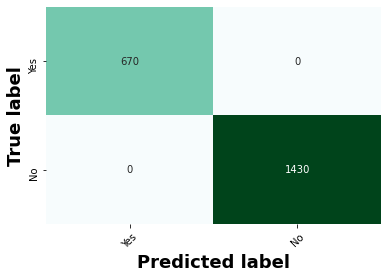

In [21]:
#@title Confusion Matrix
%matplotlib inline
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax = sns.heatmap(df_cm,  cbar = False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
plt.show()

#### Decision Tree Graph

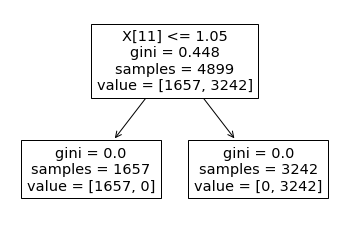

In [17]:
from sklearn import tree
tree.plot_tree(classifier);

# text_representation = tree.export_text(clf)
# print(text_representation)

In [ ]:
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# tree.plot_tree(clf,
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);

#### Best Fit Graph

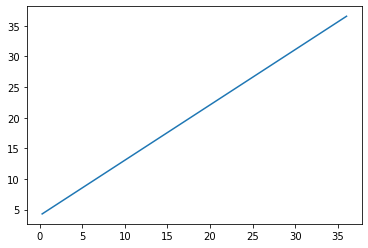

In [58]:
plt.plot(np.unique(df['Temp9am']), np.poly1d(np.polyfit(df['Temp9am'], df['Temp3pm'], 1))(np.unique(df['Temp9am'])))


In [ ]:
from sklearn.linear_model import LinearRegression

XX, YY = x.reshape(-1,1), x.reshape(-1,1)
plt.plot( XX, LinearRegression().fit(XX, YY).predict(XX) )

In [ ]:
# best fit line from scipy

# from scipy.stats import linregress
# slope, intercept, r_value, p_value, std_err = linregress(df['x'], df['y'])

In [ ]:
# You can do the whole fit and plot in one fell swoop with Seaborn.

# import pandas as pd
# import seaborn as sns
# data_reduced= pd.read_csv('fake.txt',sep='\s+')
# sns.regplot(data_reduced['2005'],data_reduced['2015'])